# Load Packages

In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
# using Turing
# using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using LsqFit
using BlackBoxOptim
using LaTeXStrings
using JLD2
using KernelDensity

In [3]:
using XLSX

In [4]:
xf1 = XLSX.readxlsx("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\NADHQuantification_Data\\2024_03_20\\NADH_IM_David_20240320_173405.xlsx")
xf2 = XLSX.readxlsx("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\NADHQuantification_Data\\2024_03_20\\NADH_IM_David (Modified)_20240320_50ms.xlsx")
xf3 = XLSX.readxlsx("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\NADHQuantification_Data\\2024_03_20\\NADH_IM_David (Modified)_20240320_300 ms.xlsx")
xf4 = XLSX.readxlsx("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\NADHQuantification_Data\\2024_03_20\\NADH_IM_David (Modified)_20240320_173711_40 flashes.xlsx")

XLSXFile("C:\IBECPostDocDrive\2024_01_16_NCvsKR\Paper\NADHQuantification_Data\2024_03_20\NADH_IM_David (Modified)_20240320_173711_40 flashes.xlsx") containing 1 Worksheet
            sheetname size          range        
-------------------------------------------------
         Result sheet 46x13         A1:M46       


In [5]:
XLSX.sheetnames(xf1)

1-element Vector{String}:
 "Result sheet"

In [6]:
sh1 = xf1["Result sheet"]
sh2 = xf2["Result sheet"]
sh3 = xf3["Result sheet"]
sh4 = xf4["Result sheet"]

46×13 XLSX.Worksheet: ["Result sheet"](A1:M46) 

In [7]:
sh1["B34:M41"]

8×12 Matrix{Any}:
 0.3152  0.3513  0.4088  0.4684  0.5224  …  0.4257  0.4893  0.5062  0.528
 0.5526  0.5257  0.5757  0.5708  0.557      0.5005  0.541   0.5429  0.5531
 0.5438  0.5016  0.5577  0.5306  0.5291     0.8951  0.5704  0.5642  0.5616
 0.5771  0.5671  0.568   0.5525  0.5571     0.4862  0.5585  0.57    0.5366
 0.5605  0.5796  0.5793  0.4978  0.0575     0.0554  0.0565  0.0576  0.058
 0.0554  0.0589  0.0609  0.0564  0.0605  …  0.2875  0.3437  0.3512  0.3455
 0.3602  0.3402  0.3514  0.3315  0.3467     0.3524  0.36    0.3638  0.335
 0.3535  0.307   0.3456  0.3401  0.3645     0.3502  0.3455  0.3571  0.3313

In [8]:
nhd1 = reshape(transpose(sh1["B34:M41"]),96);
nhd2 = reshape(transpose(sh2["B34:M41"]),96);
nhd3 = reshape(transpose(sh3["B34:M41"]),96);
nhd4 = reshape(transpose(sh4["B34:M41"]),96);

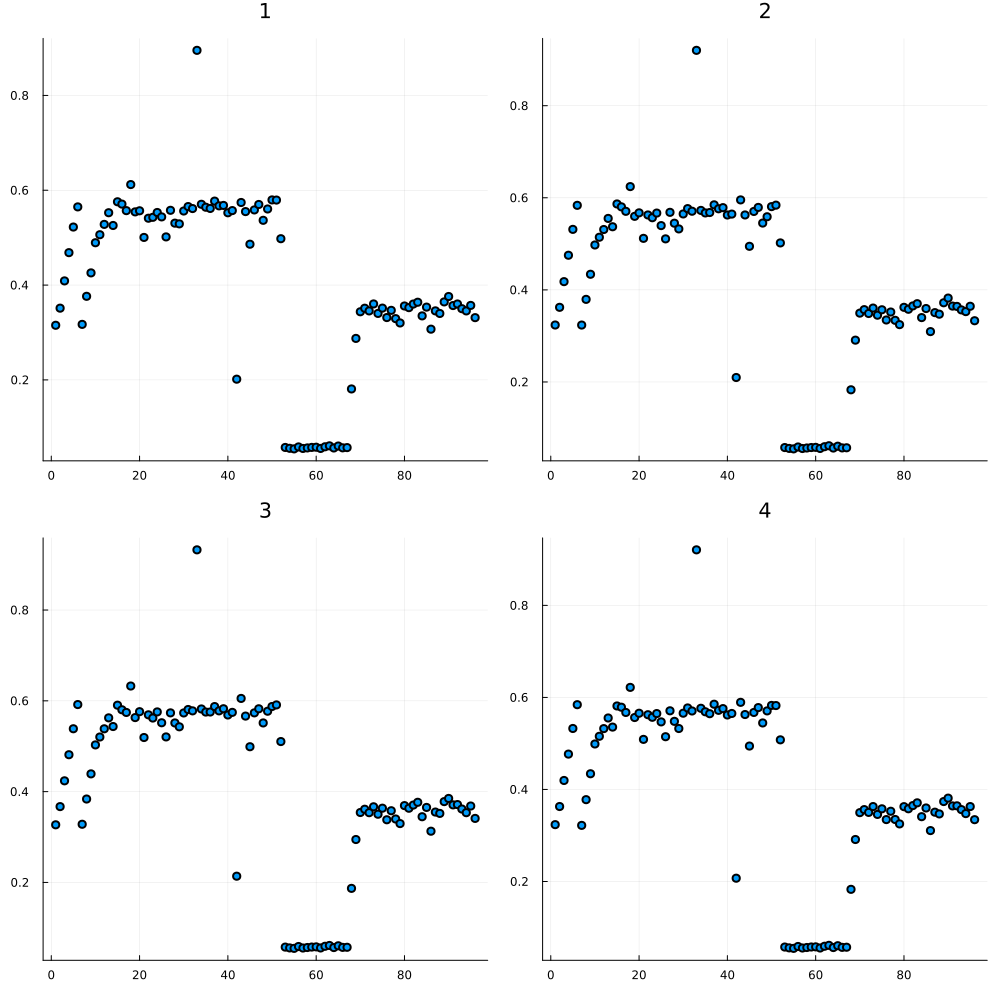

In [9]:
plot(scatter(nhd1, label = "", title = "1"), scatter(nhd2, label = "", title = "2"), 
scatter(nhd3, label = "", title = "3"), scatter(nhd4, label = "", title = "4"), size=(1000,1000))

In [10]:
# cal = (nhd3[1:6]+nhd3[7:12])./2
cal = (nhd3[1:6]+nhd3[1:6])./2

6-element Vector{Float64}:
 0.3269
 0.367
 0.4238
 0.4813
 0.5385
 0.5918

In [11]:
con = ((nhd3.-minimum(cal))/(maximum(cal)-minimum(cal)))*100;

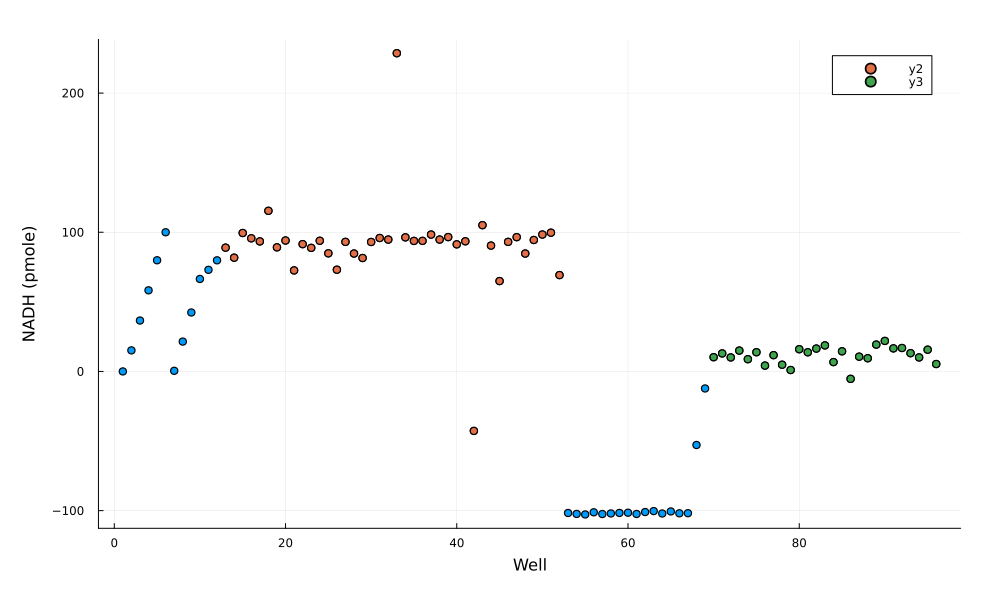

In [12]:
scatter(1:96, con, label = "", size=(1000,600), ylabel="NADH (pmole)", xlabel = "Well", margin = 8mm)
scatter!(13:52, con[13:52])
scatter!(70:96, con[70:96])

In [15]:
println("---------------- pmole Per Well ----------------")
println("NAD_Tot:")
println("N("*string(mean(con[13:52]))*", "*string(std(con[13:52]))*")")
println("NADH:")
println("N("*string(mean(con[70:96]))*", "*string(std(con[70:96]))*")")

---------------- pmole Per Well ----------------
NAD_Tot:
N(91.15704039260098, 32.11918221160784)
NADH:
N(11.564112243613934, 6.022220935747861)


In [16]:
cpw = 2.5e6/(96-12) # Total number of cells per well

29761.904761904763

In [17]:
cf = 1e6/cpw

33.6

In [18]:
con2 = (con*1e6)/cpw;

In [19]:
println("---------------- pmole Per Million Cells ----------------")
println("NAD_Tot:")
println("N("*string(mean(con2[13:52]))*", "*string(std(con2[13:52]))*")")
println("NADH:")
println("N("*string(mean(con2[70:96]))*", "*string(std(con2[70:96]))*")")

---------------- pmole Per Million Cells ----------------
NAD_Tot:
N(3062.8765571913927, 1079.2045223100233)
NADH:
N(388.5541713854283, 202.34662344112814)


In [20]:
celV = 850; # um^3 according to "In-depth quantitative analysis and comparison of the human hepatocyte and hepatoma cell line HepG2 proteomes"

In [21]:
celVL = celV*1e-15 # In Liters

8.500000000000001e-13

In [22]:
con3 = ((con2/(10^12))/celVL)*1000;

In [23]:
println("---------------- mM ----------------")
println("NAD_Tot:")
println("N("*string(mean(con3[13:52]))*", "*string(std(con3[13:52]))*")")
println("NADH:")
println("N("*string(mean(con3[70:96]))*", "*string(std(con3[70:96]))*")")

---------------- mM ----------------
NAD_Tot:
N(3.60338418493105e6, 1.2696523791882626e6)
NADH:
N(457122.55457109207, 238054.85110720957)


In [24]:
println("---------------- mM ----------------")
println("NAD+:")
println("N("*string(mean(con3[13:52] .- mean(con3[70:96])))*", "*string(std(con3[13:52] .- mean(con3[70:96])))*")")
println("NADH:")
println("N("*string(mean(con3[70:96]))*", "*string(std(con3[70:96]))*")")

---------------- mM ----------------
NAD+:
N(3.146261630359958e6, 1.2696523791882626e6)
NADH:
N(457122.55457109207, 238054.85110720957)


In [25]:
println("---------------- uM 3 million ----------------")
println("NAD+:")
println("N("*string(mean(con3[13:52]*3*1000 .- mean(con3[70:96]*3*1000)))*", "*string(std(con3[13:52]*3*1000 .- mean(con3[70:96]*3*1000)))*")")
println("NADH:")
println("N("*string(mean(con3[70:96]*3*1000))*", "*string(std(con3[70:96]*3*1000))*")")

---------------- uM 3 million ----------------
NAD+:
N(9.438784891079874e9, 3.808957137564788e9)
NADH:
N(1.3713676637132761e9, 7.141645533216287e8)


THIS IS THE CORRECT ONE!!!!

In [26]:
println("---------------- uM per Cell ----------------")
println("NAD+:")
println("N("*string(mean(con3[13:52]*1000 / 1e6 .- mean(con3[70:96]*1000 / 1e6)))*", "*string(std(con3[13:52]*1000 / 1e6 .- mean(con3[70:96]*1000 / 1e6)))*")")
println("NADH:")
println("N("*string(mean(con3[70:96]*1000 / 1e6))*", "*string(std(con3[70:96]*1000 / 1e6))*")")

---------------- uM per Cell ----------------
NAD+:
N(3146.2616303599575, 1269.6523791882628)
NADH:
N(457.122554571092, 238.05485110720954)


In [27]:
NADH1mil = con3[70:96];
NAD1mil = con3[13:52] .- mean(con3[70:96]);

In [28]:
["#e3856bff" "#80c4b7ff"]

1×2 Matrix{String}:
 "#e3856bff"  "#80c4b7ff"

In [34]:
JLD2.save("NAD_ProcData1M.jld", "NADH1mil", NADH1mil, "NAD1mil", NAD1mil)

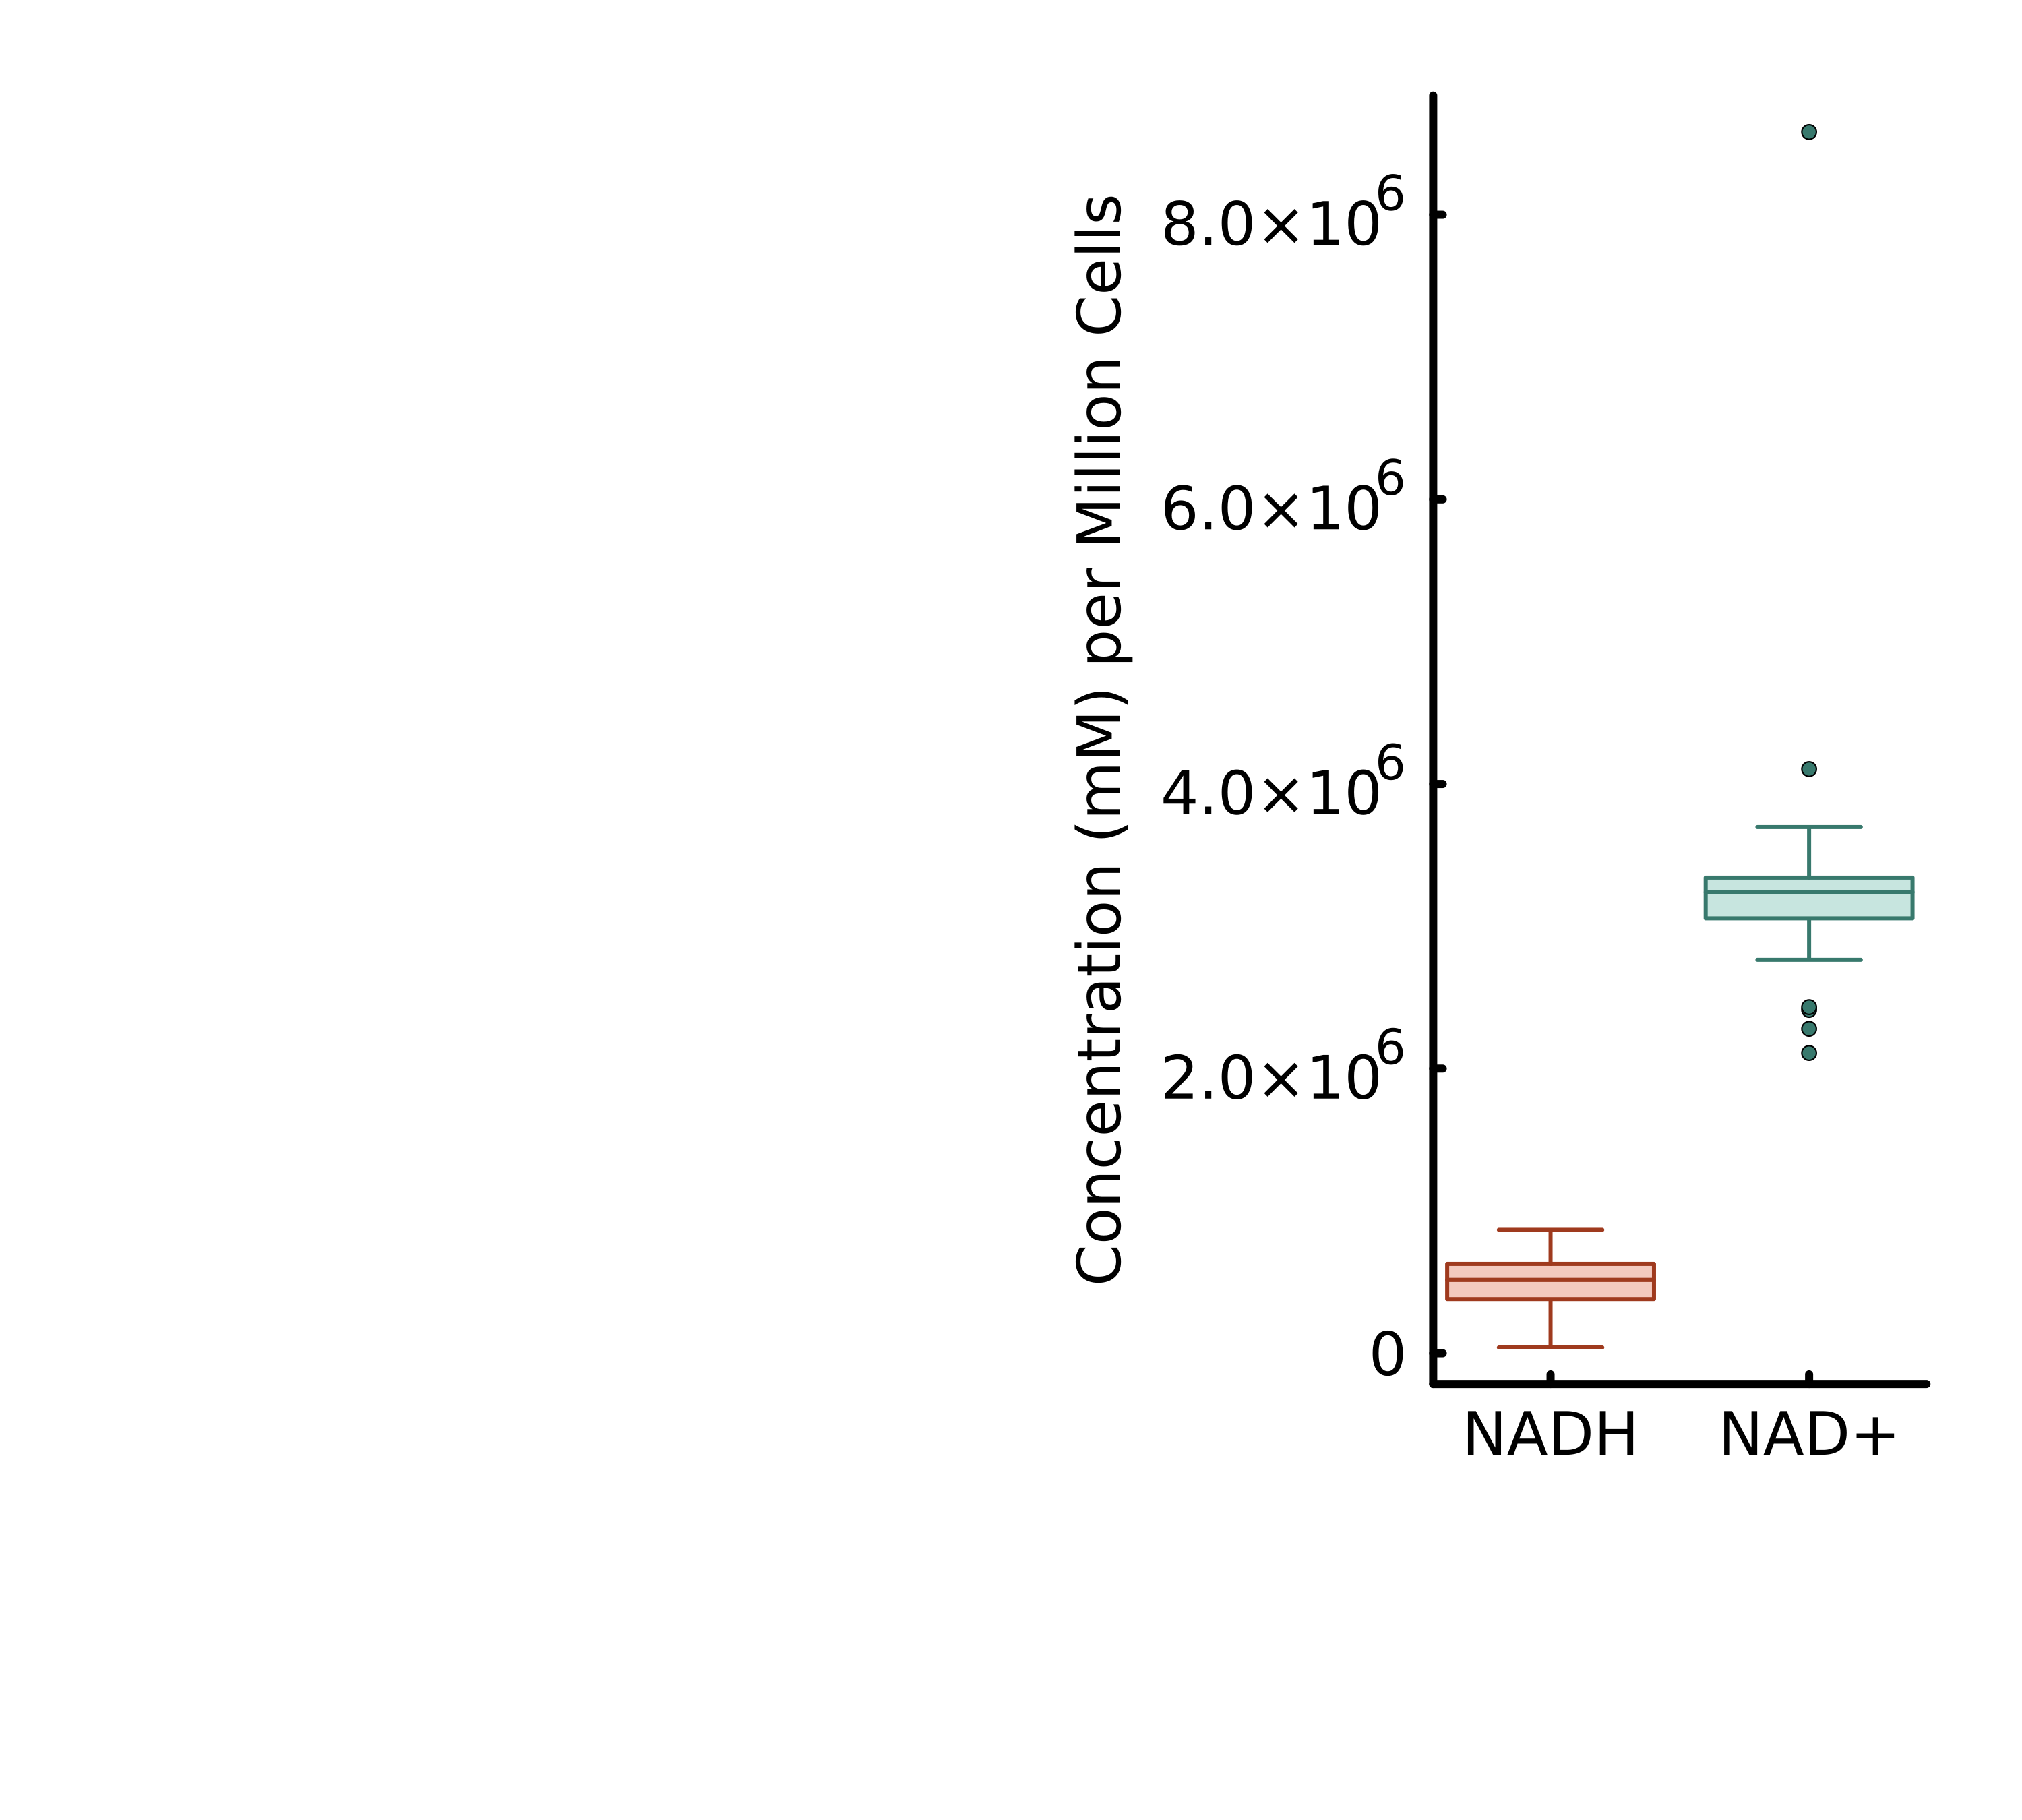

In [35]:
PP = boxplot(transpose([1, 2]), [NADH1mil[NADH1mil.>0], NAD1mil[NAD1mil.>0]],  xlabel = "", ylabel = "Concentration (mM) per Million Cells", label = "", grid = false, markersize=round(5/5), markerstrokewidth=0.1, linewidth=0.5, size = (1000,900), xguidefontsize=round(25/5), yguidefontsize=round(25/5), tickfontsize=round(25/5), colour = ["#f3c9beff" "#c7e5dfff"], thickness_scaling = 4, dpi = 300, markercolour = ["#9f3a1eff" "#38796dff"], linecolour = ["#9f3a1eff" "#38796dff"],xticks = (1:2, ["NADH", "NAD+"]))

# savefig(PP,"C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SuppFig8Stuff\\SupplementaryFigure_NADHQuantification.svg")

display(PP)